In [12]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Load and Clean Data
df = pd.read_csv('/content/drive/MyDrive/Data Set/training.1600000.processed.noemoticon.csv',encoding='latin-1',header=None,on_bad_lines='skip',engine='python')  # Fix parsing issues
df = df[[0, 5]]  # Keep sentiment and tweet text columns only
df.columns = ['sentiment', 'text']

# Cleaning function for tweets
def clean_text(text):
    text = re.sub(r"http\S+", "", text)       # Remove URLs
    text = re.sub(r"@\w+", "", text)          # Remove mentions
    text = re.sub(r"#", "", text)             # Remove hashtag symbol
    text = re.sub(r"[^A-Za-z\s]", "", text)   # Remove emojis, punctuation, special chars
    return text.lower().strip()               # Convert to lowercase

df['clean_text'] = df['text'].apply(clean_text)

In [7]:
# Task 2: Map sentiment labels
label_map = {0: -1, 2: 0, 4: 1}
df['sentiment'] = df['sentiment'].map(label_map)

# Optional: Downsample for performance
df_sampled = df.sample(n=100000, random_state=42)

In [8]:
# Task 3: Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_sampled['clean_text'])
y = df_sampled['sentiment']


In [9]:
# Task 4: Model Building with Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Classification Report:

              precision    recall  f1-score   support

    Negative       0.78      0.76      0.77      9995
     Neutral       0.00      0.00      0.00         0
    Positive       0.77      0.79      0.78     10005

    accuracy                           0.78     20000
   macro avg       0.52      0.52      0.52     20000
weighted avg       0.78      0.78      0.78     20000



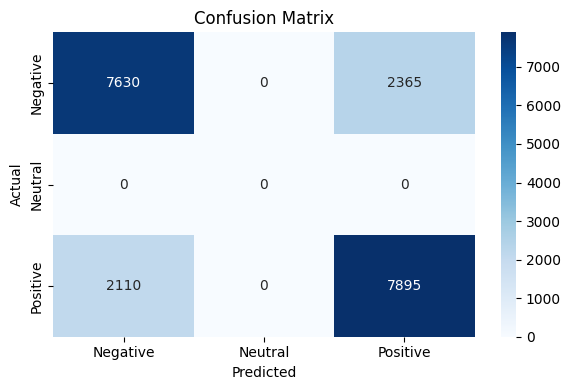

In [10]:
# Task 5: Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])

# Classification Report (fixed with zero_division=0)
print("Classification Report:\n")
print(classification_report(y_test, y_pred,
                            labels=[-1, 0, 1],
                            target_names=["Negative", "Neutral", "Positive"],
                            zero_division=0))

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [11]:
# Deliverables
print(f"""
Deliverables
============

• Accuracy Score of the Model: {accuracy:.4f}

• Confusion Matrix: (see visualization above)

• Short Write-up:
-----------------
• Model Chosen: Logistic Regression
  - Reason: It is a simple and efficient baseline for text classification tasks and works well with high-dimensional sparse data like TF-IDF.

• Role of TF-IDF:
  - TF-IDF (Term Frequency-Inverse Document Frequency) converts text into numerical values, highlighting important words that are unique to individual tweets.
  - It reduces the weight of common words (like 'the', 'is') and emphasizes distinguishing words that affect sentiment.

• Challenges Faced:
  - The raw tweets contained a lot of noise (URLs, mentions, emojis), which could confuse the model. This was solved using regular expressions for thorough text cleaning.
  - The dataset is large (~1.6 million rows), which made processing slow. We resolved this by sampling 100,000 rows to strike a balance between speed and representativeness.
""")



Deliverables

• Accuracy Score of the Model: 0.7762

• Confusion Matrix: (see visualization above)

• Short Write-up:
-----------------
• Model Chosen: Logistic Regression
  - Reason: It is a simple and efficient baseline for text classification tasks and works well with high-dimensional sparse data like TF-IDF.

• Role of TF-IDF:
  - TF-IDF (Term Frequency-Inverse Document Frequency) converts text into numerical values, highlighting important words that are unique to individual tweets.
  - It reduces the weight of common words (like 'the', 'is') and emphasizes distinguishing words that affect sentiment.

• Challenges Faced:
  - The raw tweets contained a lot of noise (URLs, mentions, emojis), which could confuse the model. This was solved using regular expressions for thorough text cleaning.
  - The dataset is large (~1.6 million rows), which made processing slow. We resolved this by sampling 100,000 rows to strike a balance between speed and representativeness.

